In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', None)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
market_basket_df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
market_basket_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
basket_items = []
for index, row in market_basket_df.iterrows():
   cleansed_items = [item for item in row if str(item)!= 'nan']
   basket_items.append(cleansed_items)
basket_items[:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

In [13]:
tran_encod = TransactionEncoder()
#tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
te_arry = tran_encod.fit(basket_items).transform(basket_items)
# tran_encod_list = tran_encod.fit_transform(basket_items)
transaction_df = pd.DataFrame(te_arry, columns=tran_encod.columns_)
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [14]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((120, 1),
                    frequency
 mineral water           1788
 eggs                    1348
 spaghetti               1306
 french fries            1282
 chocolate               1229
 green tea                991
 milk                     972
 ground beef              737
 frozen vegetables        715
 pancakes                 713)

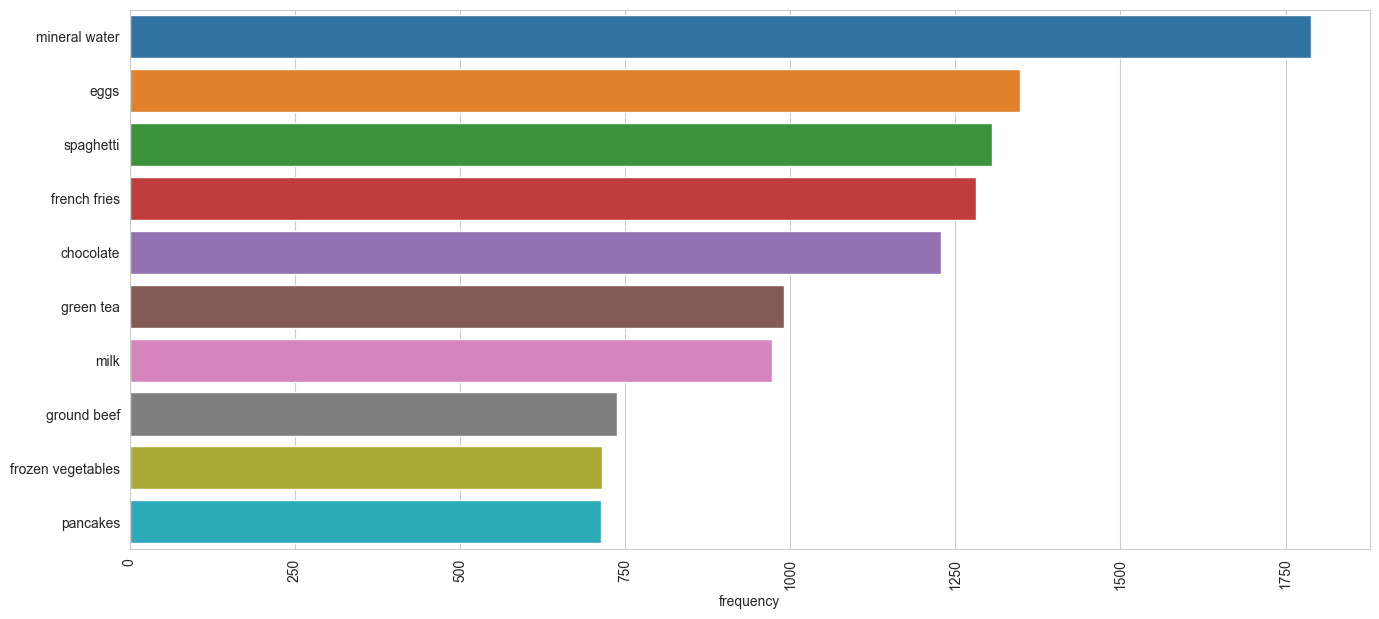

In [16]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
plt.xticks(rotation=90)
plt.show()

In [17]:
apriori(transaction_df, min_support=0.1, use_colnames=True)


,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [22]:
print('freq>200: {} items'.format(item_freq_df[item_freq_df.frequency>200].shape[0]))
print('freq>100: {} items'.format(item_freq_df[item_freq_df.frequency>100].shape[0]))
print('freq>50: {} items'.format(item_freq_df[item_freq_df.frequency>50].shape[0]))

freq>200: 41 items
freq>100: 66 items
freq>50: 92 items


In [25]:
pd.set_option('display.max_rows', 15)
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
...,...,...
49,0.039195,"(spaghetti, ground beef)"
50,0.047994,"(milk, mineral water)"
51,0.035462,"(spaghetti, milk)"
52,0.033729,"(pancakes, mineral water)"


In [26]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.2)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
...,...,...,...,...,...,...,...,...,...,...
22,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043,0.440468
23,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061,0.417935
24,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712
25,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [27]:
trans_wo_water_df = transaction_df.drop(columns=['mineral water'])
freq_itemset_wo_water_supp = apriori(trans_wo_water_df, min_support=0.02, use_colnames=True)
freq_itemset_wo_water_supp

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
77,0.035462,"(spaghetti, milk)"
78,0.022930,"(spaghetti, olive oil)"
79,0.025197,"(spaghetti, pancakes)"
80,0.021197,"(spaghetti, shrimp)"


In [29]:
wo_water_assoc_rules = association_rules(freq_itemset_wo_water_supp, metric='confidence', min_threshold=0.2)
wo_water_assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
1,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
2,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,0.006283,1.095602,0.320707
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
4,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
...,...,...,...,...,...,...,...,...,...,...
27,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061,0.417935
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
29,(pancakes),(spaghetti),0.095054,0.174110,0.025197,0.265077,1.522468,0.008647,1.123778,0.379218
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209,0.444850


In [30]:
wo_water_assoc_rules.sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
31,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
30,(shrimp),(spaghetti),0.071457,0.174110,0.021197,0.296642,1.703760,0.008756,1.174209,0.444850
...,...,...,...,...,...,...,...,...,...,...
17,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
3,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
11,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286
5,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169


In [31]:
wo_water_assoc_rules.sort_values('lift', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
25,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
28,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
20,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781,0.526755
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
...,...,...,...,...,...,...,...,...,...,...
11,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286
17,(eggs),(spaghetti),0.179709,0.174110,0.036528,0.203264,1.167446,0.005239,1.036592,0.174852
16,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081,0.173666
22,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405,0.153188
